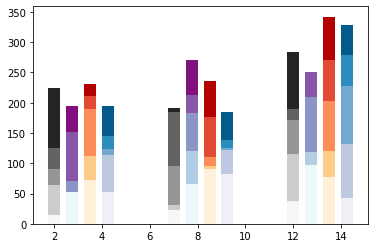

In [50]:
# S/E/I/R : 4 bars in each group
# each group is one week; 3 weeks
# age cat 1 to 5; 5 categories vertically in each bar

# csv format input 
# each row has three keys which together identify the row uniquely (age; week; SEIR)


import matplotlib.pyplot as plt
import csv
import random



# generate dummy data
with open('dummy_data.csv','w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerow(['Week','State_SEIR','Age_Cat','Value'])
    for i in ['Week 1', 'Week 2', 'Week 3']: # 3 weeks
        for j in ['S','E','I','R']:
            for k in ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']:
                csvwriter.writerow([i,j,k, int(random.random()*100)])


# inputs: 
vertical_stacking_variable = 'Age_Cat'
sorted_order_for_stacking = ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']

# colormaps 
# we need 4 colormaps for SEIR
c_map_vertical = {}
c_map_vertical['S'] = ['#f7f7f7','#cccccc','#969696','#636363','#252525']
c_map_vertical['E'] = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
c_map_vertical['I'] = ['#fef0d9','#fdcc8a','#fc8d59','#e34a33','#b30000']
c_map_vertical['R']= ['#f1eef6','#bdc9e1','#74a9cf','#2b8cbe','#045a8d']


## 
width = 0.5
state = 'S'
week = 'Week 1'
first_offset = 2

state_num = -1
for state in ['S','E','I','R']:
    state_num += 1

    week_num = -1
    for week in ['Week 1', 'Week 2','Week 3']:
        week_num += 1

        a = [0] * len(sorted_order_for_stacking)
        for i in range(len(sorted_order_for_stacking)):
            with open('dummy_data.csv') as f:
                next(f) # skip the first line
                for row in f:
                    listed = row.strip().split(',')
                    if listed[1] == state and listed[0] == week and listed[2] == sorted_order_for_stacking[i]:
                        # print (listed)
                        a[i]= (float(listed[3]))
        
        # get cumulative values
        cum_val = [a[0]]
        for j in range(1,len(a)):
            cum_val.append( cum_val[j-1] + a[j] )

        # trick to make them all visible: Plot in descending order of their height!! :) 
        for i in range(len(sorted_order_for_stacking)-1,-1,-1):
            plt.bar(first_offset + week_num*5 + state_num*width*1.5, height=cum_val[i] , width=width, color=c_map_vertical[state][i])

# plt.bar(x1,height=[2,3,4,6] , width=width)

plt.show()